In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
dataset = pd.read_csv('house_price_regression_dataset.csv')

In [ ]:
house_price_regression = dataset.sample(frac=0.95, random_state=42)
data_test = dataset.drop(house_price_regression.index)

In [ ]:
data_test.to_csv('data_test.csv', index=False)
house_price_regression.to_csv('house_price_regression.csv', index=False)

In [ ]:
df = pd.read_csv('house_price_regression.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,4012,3,1,2016,2.098092,1,5,9.010005e+05
1,2310,3,1,1988,1.369622,1,4,4.945375e+05
2,4708,1,3,1962,1.792970,1,8,9.494042e+05
3,4932,2,1,1972,4.479598,1,2,1.040389e+06
4,3646,1,1,1994,3.980987,0,9,7.940100e+05


In [ ]:
df.shape

(950, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        950 non-null    int64  
 1   Num_Bedrooms          950 non-null    int64  
 2   Num_Bathrooms         950 non-null    int64  
 3   Year_Built            950 non-null    int64  
 4   Lot_Size              950 non-null    float64
 5   Garage_Size           950 non-null    int64  
 6   Neighborhood_Quality  950 non-null    int64  
 7   House_Price           950 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 59.5 KB


In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,2821.596842,2.966316,1.984211,1986.596842,2.779062,1.015789,5.614737,6.198588e+05
std,1260.927230,1.424208,0.821704,20.694644,1.298837,0.812678,2.882488,2.547311e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1752.000000,2.000000,1.000000,1969.000000,1.670572,0.000000,3.000000,4.022426e+05
50%,2880.500000,3.000000,2.000000,1986.500000,2.809740,1.000000,6.000000,6.315072e+05
75%,3855.500000,4.000000,3.000000,2004.000000,3.928243,2.000000,8.000000,8.273756e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,4012,3,1,2016,2.098092,1,5,9.010005e+05
1,2310,3,1,1988,1.369622,1,4,4.945375e+05
2,4708,1,3,1962,1.792970,1,8,9.494042e+05
3,4932,2,1,1972,4.479598,1,2,1.040389e+06
4,3646,1,1,1994,3.980987,0,9,7.940100e+05


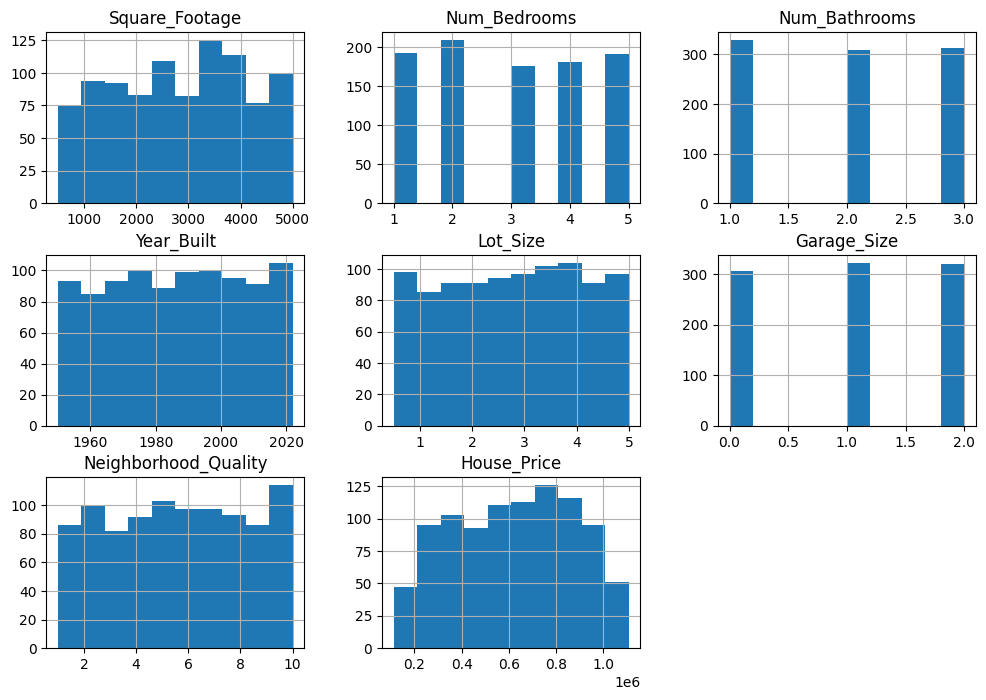

In [ ]:
viz = df[['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality','House_Price']]
viz.hist(layout=(3, 3), figsize=(12, 8))
plt.show()

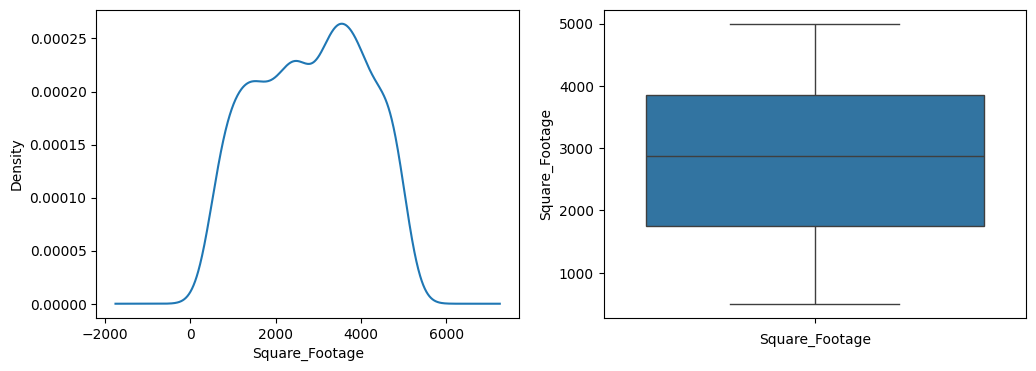

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
df['Square_Footage'].plot(kind='kde')
plt.xlabel("Square_Footage")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Square_Footage'])
plt.xlabel("Square_Footage")

plt.show()

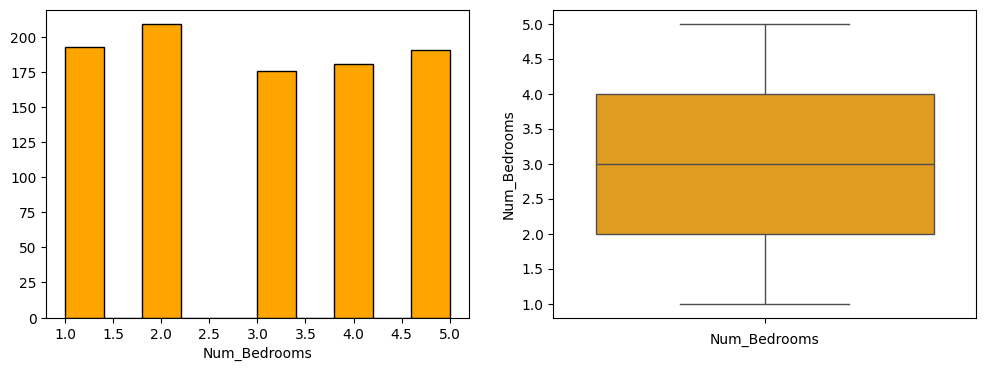

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
plt.hist(df['Num_Bedrooms'], color='orange', edgecolor='black')
plt.xlabel("Num_Bedrooms")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Num_Bedrooms'], color='orange')
plt.xlabel("Num_Bedrooms")

plt.show()

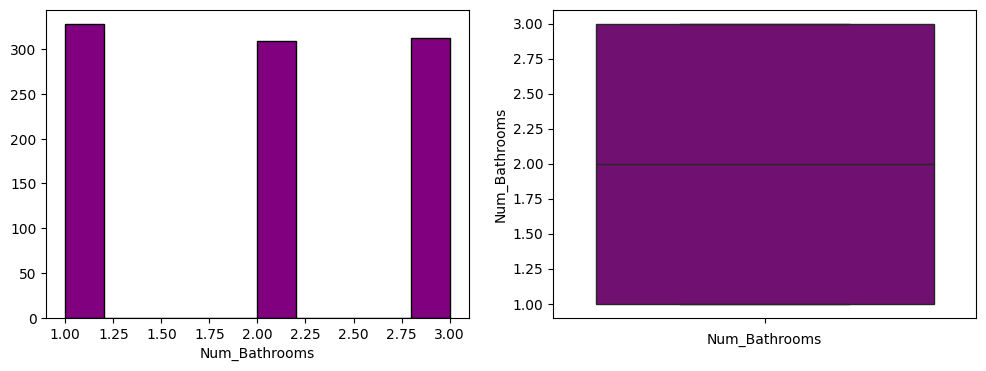

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
plt.hist(df['Num_Bathrooms'], color='purple', edgecolor='black')
plt.xlabel("Num_Bathrooms")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Num_Bathrooms'], color='purple')
plt.xlabel("Num_Bathrooms")

plt.show()

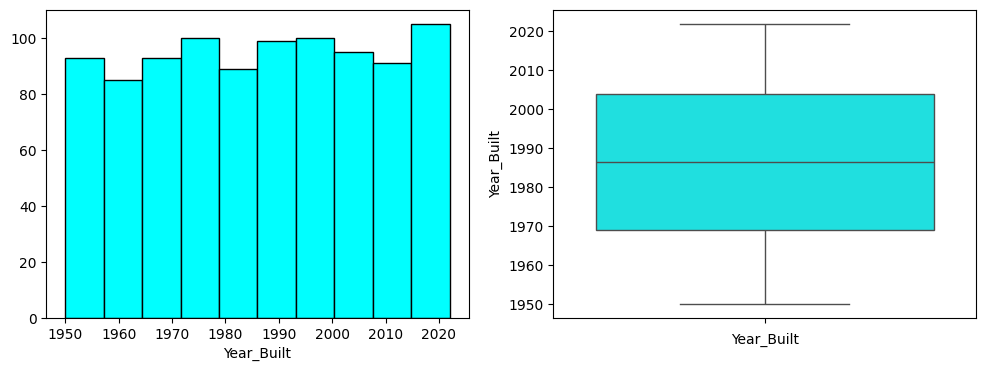

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
plt.hist(df['Year_Built'], color='cyan', edgecolor='black')
plt.xlabel("Year_Built")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Year_Built'], color='cyan')
plt.xlabel("Year_Built")

plt.show()

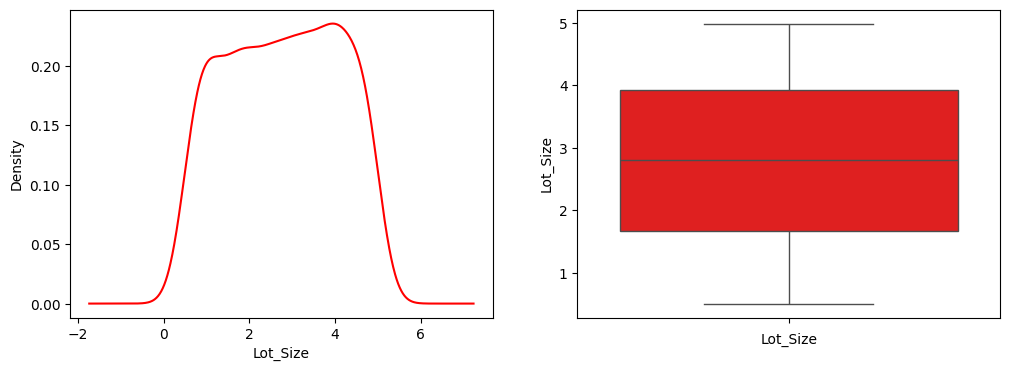

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
df['Lot_Size'].plot(kind='kde', color='red')
plt.xlabel("Lot_Size")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Lot_Size'], color='red')
plt.xlabel("Lot_Size")

plt.show()

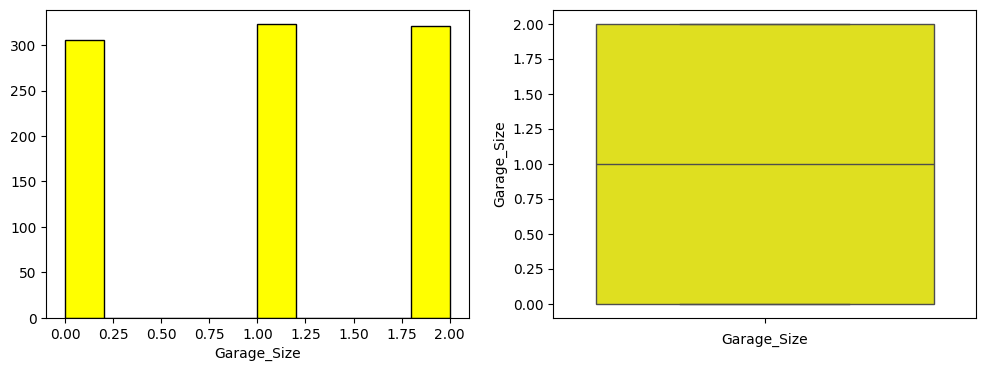

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
plt.hist(df['Garage_Size'], color='yellow', edgecolor='black')
plt.xlabel("Garage_Size")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Garage_Size'], color='yellow')
plt.xlabel("Garage_Size")

plt.show()

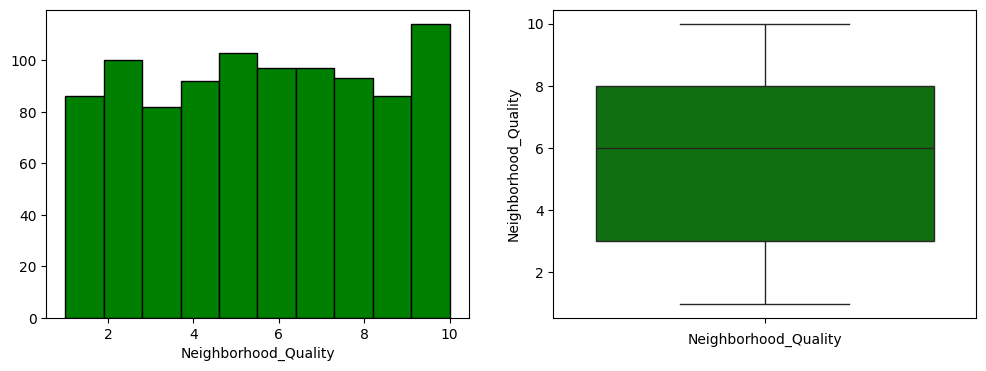

In [ ]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
plt.hist(df['Neighborhood_Quality'], color='green', edgecolor='black')
plt.xlabel("Neighborhood_Quality")

f.add_subplot(1, 2, 2)
sns.boxplot(df['Neighborhood_Quality'], color='green')
plt.xlabel("Neighborhood_Quality")

plt.show()

<Figure size 1000x800 with 0 Axes>

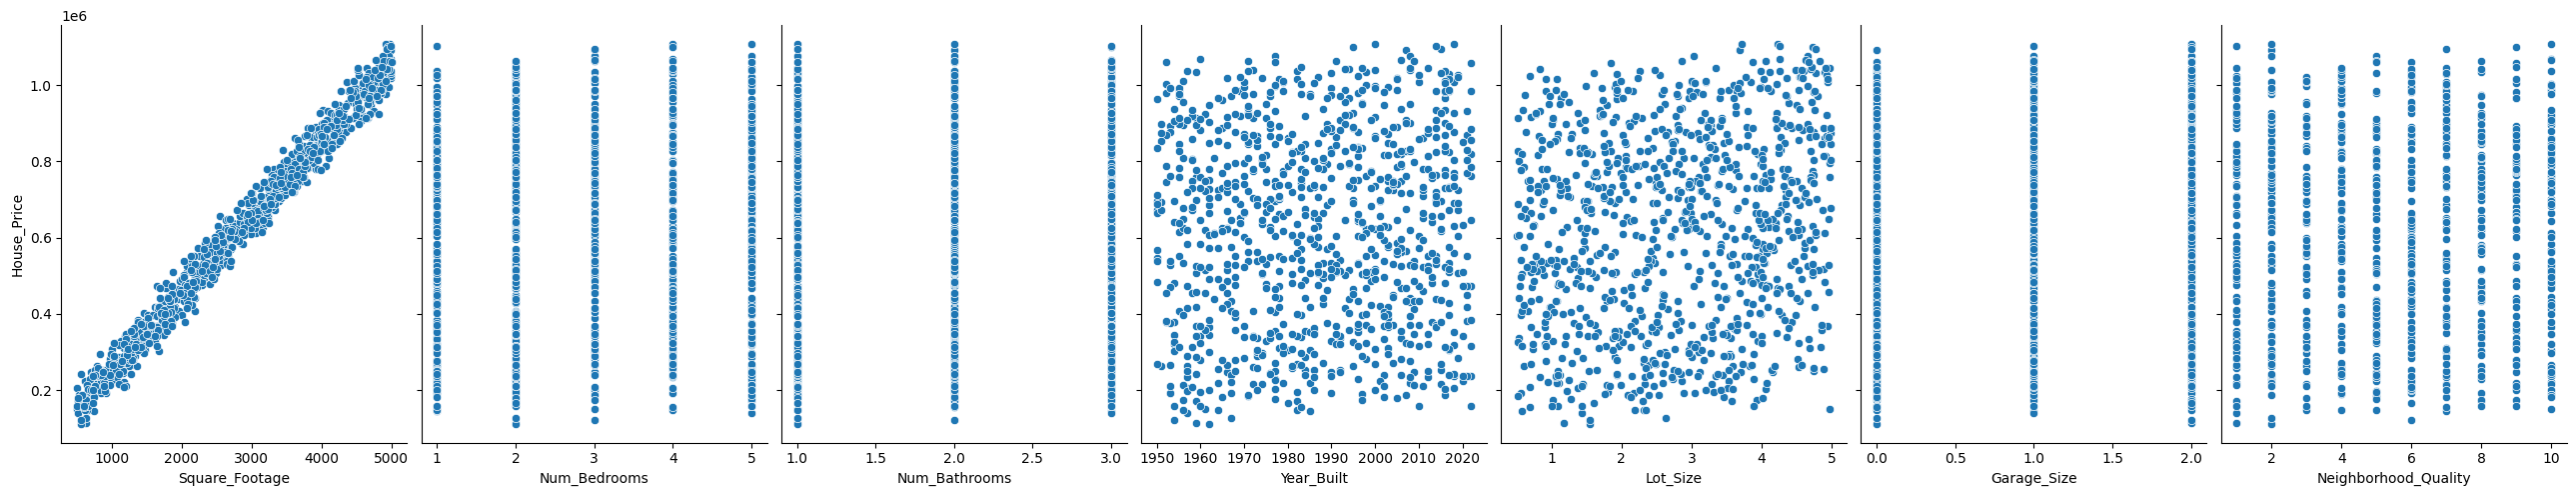

In [ ]:
f = plt.figure(figsize=(10, 8))

sns.pairplot(data = df, x_vars = ['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality'], y_vars = 'House_Price', size = 5, aspect = 0.75)
plt.show()

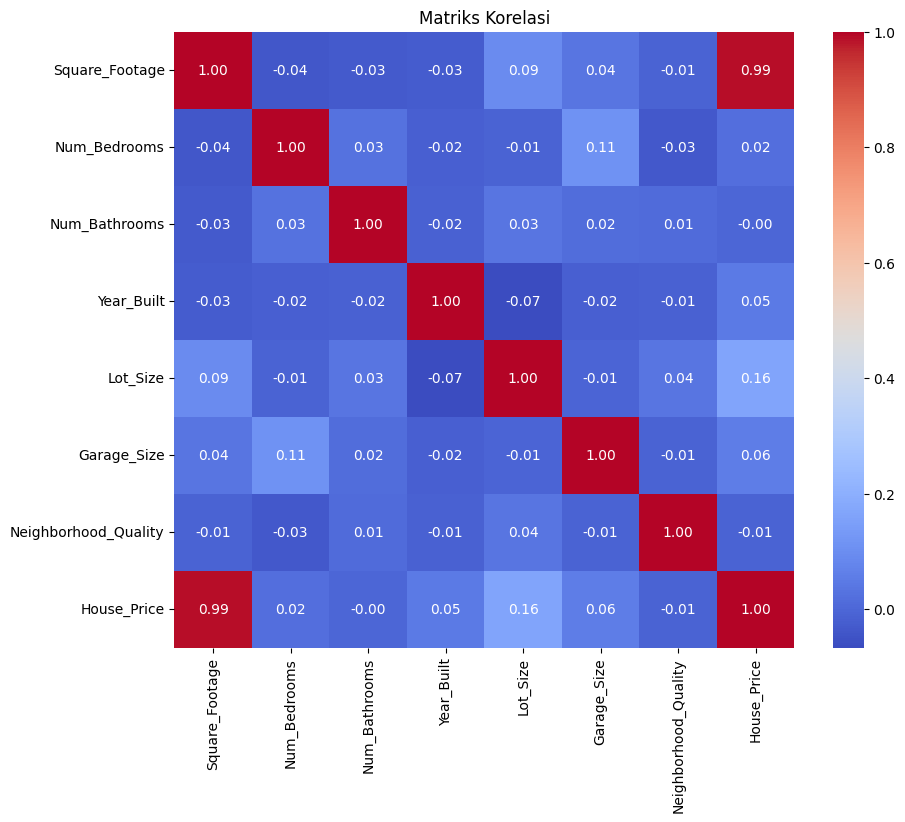

In [ ]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
x = df.drop('House_Price', axis=1)
y = df['House_Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(760, 7)
(190, 7)
(760,)
(190,)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 -2014174.8214078732
Coefficients: 
 [1.99623763e+02 9.96913025e+03 8.23845446e+03 9.95519356e+02
 1.49406059e+04 5.41638022e+03 1.01468310e+01]


In [ ]:
coef_dict = {
    'features': x.columns,
    'coef_value': lin_reg.coef_
}

coef_df = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef_df

,features,coef_value
0,Square_Footage,199.623763
1,Num_Bedrooms,9969.130252
2,Num_Bathrooms,8238.454456
3,Year_Built,995.519356
4,Lot_Size,14940.605877
5,Garage_Size,5416.380223
6,Neighborhood_Quality,10.146831


In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
lin_reg.score(x_test, y_test)

0.9984927108219056

In [ ]:
dataset = pd.read_csv('data_test.csv')

In [ ]:
data_test = dataset.drop('House_Price', axis=1)

In [ ]:
data_test.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,2547,4,2,1986,3.715886,2,8
1,3247,1,2,2005,4.467036,1,10
2,2000,3,1,2008,3.679854,0,10
3,879,4,1,1996,0.718959,2,4
4,2954,5,1,1970,1.662040,1,4


In [ ]:
predictions = lin_reg.predict(data_test)

In [ ]:
# Buat DataFrame baru dengan hasil prediksi
df_predictions = pd.DataFrame({'Prediksi': predictions})

In [ ]:
df_predictions.head()

,Prediksi
0,594153.292848
1,728723.950484
2,477302.135763
3,218081.114425
4,625059.856998


In [ ]:
df_predictions.to_csv('hasil_prediksi_harga.csv', index=False)